# INTRODUCTION

PURPOSE: The objective of this project is to analyze a customer churn dataset and create a model that predicts if a customer
is likely to churn in the next quarter

IMORTANCE:This task is important because it provides insight on whether a customer is going to churn in the next business quarter, and businesses can use this information to 
understand customer churn probabilities and know the areas to work on inorder to retain 
valuable customers and boost good customer relationship

# DATA OVERVIEW

DATASET SUMMARY:
The dataset being used is a bank customer dataset that contains customer demographics
information like age and surname and bank customer information like; balance, estimated salary, whether the customer has a credit card or not..etc. 
This dataset is made up of 20 datafields(columns), 175028 records(rows), 3 datatypes which are integer, float(decimal) and object(text).
Gender is represented with one-hot encoding for male and female categories. Age, tenure, balance, and the number of products used by the customer offer insights into their banking behavior. The presence of a credit card, active membership status, and estimated salary are also included as binary features.
Mem__no__Products is the product of the number of products and active membership status this would show actual numbers for active members and 0 for non active members as they are no longer actively using a product, therefore offering a combined metric. Cred_Bal_Sal represents the ratio of the product of credit score and balance to estimated salary(credit scores below the average indicates good financial health and credit scores above the average indicates bad financial health). The balance-to-salary ratio (Bal_sal) and the tenure-to-age ratio (Tenure_Age) offer further dimensions for analysis. Finally, Age_Tenure_product is a feature capturing the interaction between age and tenure.

The target variable, 'Exited,' indicates whether a customer has churned, with a value of 1 for churned customers and 0 for those who have not.

In [1]:
import pandas as pd
bank_data=pd.read_csv('Data sets/friance new.csv',dtype={'EstimatedSalary':'str'})
bank_data

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.0,0.0,"9.090.909.090.909.090,00",99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.5,0,...,1,0,0,0,1,2.0,0.0,0.0,"30.303.030.303.030.300,00",33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.0,0.0,0.25,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,"10.229.405.812.711.500,00","17.606.550.452.171.200,00","58.823.529.411.764.700,00",68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.0,0.0,"15.151.515.151.515.100,00",165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,2226,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,...,1,0,0,0,1,0.0,"34.222.257.268.111.300,00","5.314.015.103.743.990,00",0.25,196.0
175024,2846,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,...,1,0,0,1,0,0.0,0.0,0.0,"6.896.551.724.137.930,00",58.0
175025,1999,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,...,1,0,0,0,1,0.0,0.0,0.0,"1.282.051.282.051.280,00",195.0
175026,1336,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,...,1,0,0,0,1,1.0,"29.107.950.548.954.000,00","5.641.075.687.781.790,00","2.857.142.857.142.850,00",350.0


DATA CLEANING AND PREPROCESSING: 
1. Drop the surname column because it is numerical and does not really carry much information,also the surname_tfidf columns
2. Drop the bal_sal column as the cred_bal_sal column already provides information about financial health
3. Drop the tenure age column because it contains way too many missing values
4. Change the exited column name to churn so that it would really reflect its purpose
5. The country and gender columns would have been touched i.e preprocessed using one hot encoding, but they have already been preprocessed
6. Convert the estimatedSalary, cred_bal_sal, columns from str to float 
7. Apply a division function to the cred_bal_sal column, as the values given are not very accurate 


In [2]:
bank_data.drop(['Surname','Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4'],axis=1,inplace=True)

In [3]:
bank_data.drop('Bal_sal',axis=1,inplace=True)

In [4]:
bank_data.drop('Tenure_Age',axis=1,inplace=True)

In [5]:
bank_data.rename(columns={'Exited':'Churn'},inplace=True)
bank_data['EstimatedSalary']=pd.to_numeric(bank_data['EstimatedSalary'],errors='coerce')
bank_data['Cred_Bal_Sal']=pd.to_numeric(bank_data['Cred_Bal_Sal'],errors='coerce')
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         175028 non-null  float64
 1   Age                 175028 non-null  float64
 2   Tenure              175028 non-null  float64
 3   Balance             175028 non-null  float64
 4   NumOfProducts       175028 non-null  float64
 5   HasCrCard           175028 non-null  int64  
 6   IsActiveMember      175028 non-null  int64  
 7   EstimatedSalary     175026 non-null  float64
 8   Churn               175028 non-null  int64  
 9   France              175028 non-null  int64  
 10  Germany             175028 non-null  int64  
 11  Spain               175028 non-null  int64  
 12  Female              175028 non-null  int64  
 13  Male                175028 non-null  int64  
 14  Mem__no__Products   175028 non-null  float64
 15  Cred_Bal_Sal        93275 non-null

In [6]:
bank_data['Cred_Bal_Sal']=bank_data.apply(lambda row: (row['Balance']*row['CreditScore'])/row['EstimatedSalary'],axis=1)

Text(0, 0.5, 'frequency')

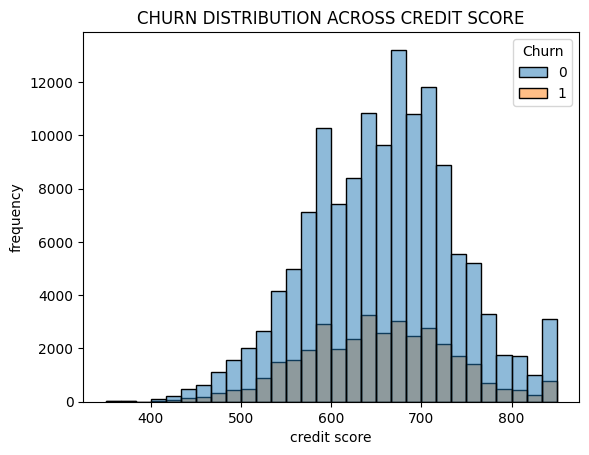

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='CreditScore',bins=30,hue='Churn',data=bank_data)
plt.title('CHURN DISTRIBUTION ACROSS CREDIT SCORE')
plt.xlabel('credit score')
plt.ylabel('frequency')

From the histogram above it is clear that the non churners outnumber the churners by a great amount and there are churners across all credit score numbers

Text(0, 0.5, 'frequency')

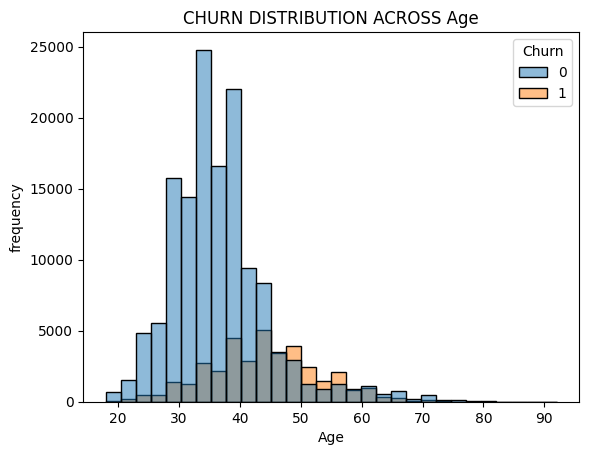

In [8]:
sns.histplot(x='Age',bins=30,hue='Churn',data=bank_data)
plt.title('CHURN DISTRIBUTION ACROSS Age')
plt.xlabel('Age')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

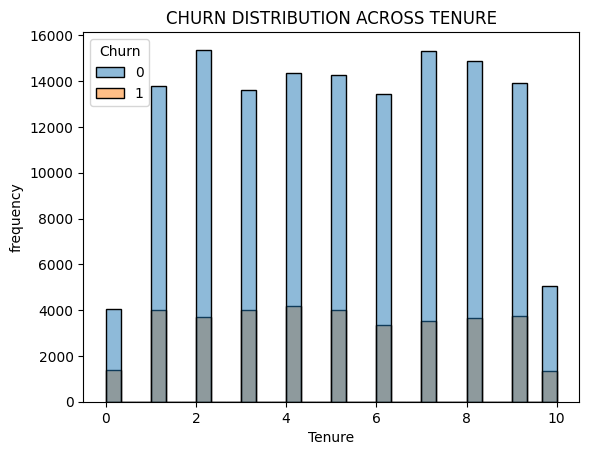

In [9]:
sns.histplot(x='Tenure',bins=30,hue='Churn',data=bank_data)
plt.title('CHURN DISTRIBUTION ACROSS TENURE')
plt.xlabel('Tenure')
plt.ylabel('frequency')

The histogram above shows that the non churners also out nummber the churners by a lot, and for all the tenures there are churners


Text(0, 0.5, 'frequency')

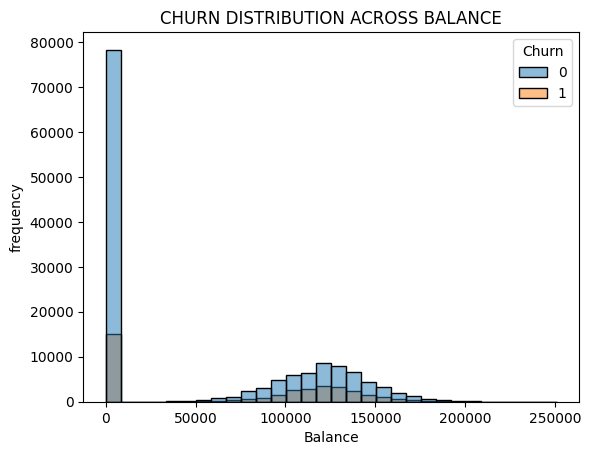

In [10]:
sns.histplot(x='Balance',bins=30,hue='Churn',data=bank_data)
plt.title('CHURN DISTRIBUTION ACROSS BALANCE')
plt.xlabel('Balance')
plt.ylabel('frequency')

For the balance(debt balance), customers with numbers around 0 to 100 are much more compared to customers with higher balances, but the customers in both categories have a much lower churn distribution compared to non churners

Text(0, 0.5, 'frequency')

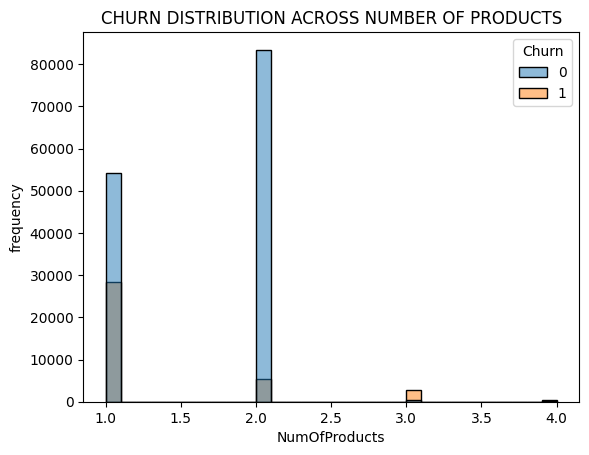

In [11]:
sns.histplot(x='NumOfProducts',bins=30,hue='Churn',data=bank_data)
plt.title('CHURN DISTRIBUTION ACROSS NUMBER OF PRODUCTS')
plt.xlabel('NumOfProducts')
plt.ylabel('frequency')

In [12]:
bank_data['NumOfProducts'].unique() # JUST FOR CLARITY ON NUM OF PRODUCTS UNIQUE VALUES

array([2., 1., 3., 4.])

For the number of products, customers with one number of product have more churners than non churners, customers with two number of products have way much more non churners than churners that the churners are negligible , customers with three number of products are almost all churners by a very large ratio even if their number is very small and customers with four number of products has much more churners than non churners

Text(0, 0.5, 'frequency')

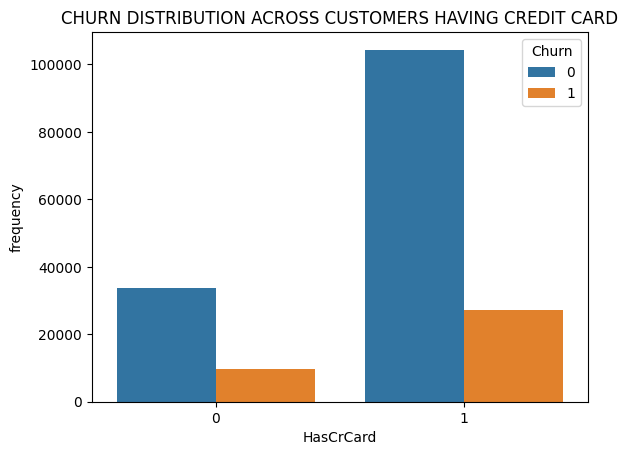

In [13]:
sns.countplot(x='HasCrCard',hue='Churn',data=bank_data)
plt.title('CHURN DISTRIBUTION ACROSS CUSTOMERS HAVING CREDIT CARD')
plt.xlabel('HasCrCard')
plt.ylabel('frequency')

The above distribution shows that the number of customers that has credit card are way more than the ones that do not have credit card and the non churners in each category outnumber the churners by a lot

From the above distribution, it shows that the are more churners in non active members than there are in active members i.e a customer is more likely churn if he/she isn't an active member any longer

Text(0, 0.5, 'NumOfProducts')

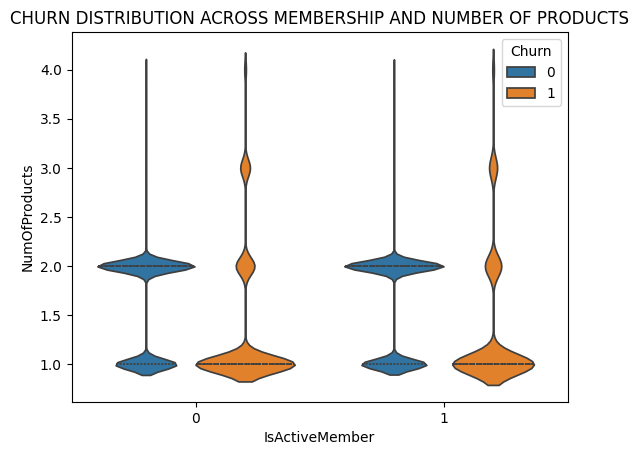

In [14]:
sns.violinplot(x='IsActiveMember',y='NumOfProducts',hue='Churn',data=bank_data,
              inner='quartile')
plt.title('CHURN DISTRIBUTION ACROSS MEMBERSHIP AND NUMBER OF PRODUCTS')
plt.xlabel('IsActiveMember')
plt.ylabel('NumOfProducts')

In [15]:
bank_data.groupby('Churn')[['NumOfProducts','IsActiveMember']].sum()

,NumOfProducts,IsActiveMember
Churn,,
0,222458.0,76264
1,49373.0,11032


From the above visualization and code we found out that for the non active members, we have a majority of two product users compared to the minority of one product users that are non-churners, and the majority of churners to be just one product users. For the active members, we have a majority of non-churners to be two product users followed by one product, and the majority of churners to be one product users followed by two and three product users. But in all, the number of non-churners are much greater than churners as the above dataframe reflect

# EDA OVERVIEW AND SOLUTION

ANALYSIS OVERVIEW

From the data exploration and analysis performed, it has been noticed that the churning customers has not been biased to one sector or few sectors, but has been distributed across all sectors 

POSSIBLE SOLUTIONS

1. Sectors like ; CreditScore, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary,
Mem__no__Products, Cred_Bal_Sal, Age_Tenure_product, all depend on or has something to do with the bank products and services, and there are a good number of churners in all these sectors.
    The bank should reassess its approach in offering its products and services to its customers and possibly use a better approach inorder for its customers to feel more satisfied as this could reduce drastically the rate of customers that are churning and retain them.

2. Sectors like age and tenure also contributes to the total number of churners. To reduce the amount of churners in these sectors, the bank can use special programs for new and existing customers inorder for more effecive churning reduction results. Programs like;
    **(ONBOARDING PROGRAMS FOR NEW CUSTOMERS):
        These are programs like; In app tutorials, personalized onbaording emails..etc. These would keep the
        new customers engaged and informed about the bank's product, services and digital platform. This
        would encourage a good start in building goood relationship with the customers and can potentially
        reduce future churnings from new customers
    **(REGULAR PERSONALIZED CHECK-INS FOR EXISTING CUSTOMERS): Reaching out periodically to provide personalized account reviews or financial health checks. This ensures that customers feel valued and reminds them of the services and products they may not be using but could benefit from.

   **(LISTENING TO CUSTOMER'S FEEDBACKS AND QUESTION): Constantly pay attention to what customers has to say as regards to their feedbacks or questions, give response to customers regularly as customers are more likely to remain where they are valued and listened to.

3.Use a predictive model to easily identify when and which customers are likely to churn, so as to know which customers to prioritize on and when to do so
     

   
   
   
       
       
   

In [16]:
# bank_data.drop('Surname',axis=1,inplace=True)
bank_data.drop('EstimatedSalary',axis=1,inplace=True)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cr
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
features=bank_data.drop('Churn',axis=1)
label=bank_data['Churn']
features_train,features_test,label_train,label_test=train_test_split(features,label,test_size=0.3,random_state=42)
imputer=SimpleImputer(strategy='mean')
features_train=imputer.fit_transform(features_train)
smote=SMOTE(sampling_strategy=0.5)
features_train_balanced,label_train_balanced=smote.fit_resample(features_train,label_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_model=RandomForestClassifier()
param_grid={
    'n_estimators': [100, 150],
    'max_depth': [10, 20, 30]
}
g_search=GridSearchCV(estimator=rf_model,param_grid=param_grid,scoring='balanced_accuracy',cv=5)
r_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=5,
                                              scoring='balanced_accuracy', cv=5, random_state=42)
g_search.fit(features_train_balanced,label_train_balanced)
best_model=g_search.best_estimator_
predictions=best_model.predict(features_test)

In [25]:
classification_report=cr(label_test,predictions)
print(classification_report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     41447
           1       0.70      0.56      0.62     11062

    accuracy                           0.86     52509
   macro avg       0.80      0.75      0.77     52509
weighted avg       0.85      0.86      0.85     52509

